In [3759]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error





In [3760]:
random_state=42

# Cruide Oil WTI 

## 7:3

In [3761]:
df= pd.read_csv('../dataset/Crude Oil.csv')
df = df.dropna() # Drop missing values


### Các hàm chuyển kiểu dữ liệu cho Vol, Change, Date

In [3762]:
def convert_volume_to_number(volume_str):
    if isinstance(volume_str, float):
        return volume_str
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    else:
        return volume_str


def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%'))
    return new_change

def convert_str_to_number(str):
    return float(str.replace(',', ''))

df['Vol.'] = df['Vol.'] .apply(convert_volume_to_number)
df['Change %'] = df['Change %'].apply(convert_change_to_number)
df['Date'] = pd.to_datetime(df['Date'])
df = df.iloc[::-1].reset_index(drop=True)

In [3763]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1301 non-null   datetime64[ns]
 1   Price     1301 non-null   float64       
 2   Open      1301 non-null   float64       
 3   High      1301 non-null   float64       
 4   Low       1301 non-null   float64       
 5   Vol.      1301 non-null   int64         
 6   Change %  1301 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 71.3 KB


### Tạo hàm Eval

In [3764]:
def eval(test,pred):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)



In [3765]:

# Chuyển đổi cột 'Price' thành mảng NumPy
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

,Price
0,55.80
1,56.59
2,56.56
3,56.22
4,56.66
...,...
1296,77.72
1297,79.83
1298,79.23
1299,77.91


### Train, Test


In [3766]:
# Split the data into training, testing
train_size = int(0.7 * len(df))
test_size = len(df)-train_size
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

### Tạo và huấn luyện mô hình

In [3767]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [3768]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)


### Eval

In [3769]:
eval(y_test,y_pred)

** Testing **
MAE:  24.61020578764271
MAPE:  31.987538587241094
RMSE:  26.19194584415729


### Predict

In [3770]:
last_index =  df.index[-1]
last_data_30_days = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)
last_data_60_days = pd.RangeIndex(start=last_index+30, stop=last_index+60, step=1)
x_next_60_days = np.array(range(last_index+31, last_index+61)).reshape(-1, 1)
y_next_60_days = model.predict(x_next_60_days)
last_data_90_days = pd.RangeIndex(start=last_index+60, stop=last_index+90, step=1)
x_next_90_days = np.array(range(last_index+61, last_index+91)).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)

In [3771]:
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)
     

Predicted closing prices for the next 30 days:
[115.10681921 115.16714968 115.22748015 115.28781062 115.34814109
 115.40847155 115.46880202 115.52913249 115.58946296 115.64979343
 115.7101239  115.77045437 115.83078484 115.89111531 115.95144578
 116.01177625 116.07210672 116.13243719 116.19276766 116.25309813
 116.31342859 116.37375906 116.43408953 116.49442    116.55475047
 116.61508094 116.67541141 116.73574188 116.79607235 116.85640282]
Predicted closing prices for the next 60 days:
[116.91673329 116.97706376 117.03739423 117.0977247  117.15805516
 117.21838563 117.2787161  117.33904657 117.39937704 117.45970751
 117.52003798 117.58036845 117.64069892 117.70102939 117.76135986
 117.82169033 117.8820208  117.94235127 118.00268174 118.0630122
 118.12334267 118.18367314 118.24400361 118.30433408 118.36466455
 118.42499502 118.48532549 118.54565596 118.60598643 118.6663169 ]
Predicted closing prices for the next 90 days:
[118.72664737 118.78697784 118.84730831 118.90763878 118.96796924


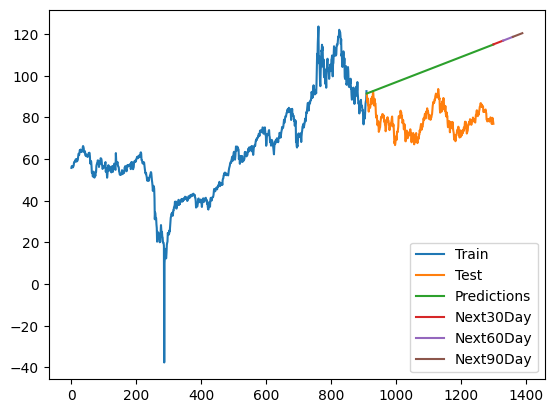

In [3772]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_30_days,y_next_30_days)
plt.plot(last_data_60_days,y_next_60_days)
plt.plot(last_data_90_days,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day','Next60Day','Next90Day'])
plt.show()

# Gasoline RBOB

## 7:3

In [3773]:
df= pd.read_csv('../dataset/Gasoline RBOB.csv')
df = df.dropna() # Drop missing values


### Các hàm chuyển kiểu dữ liệu cho Vol, Change, Date

In [3774]:
def convert_volume_to_number(volume_str):
    if isinstance(volume_str, float):
        return volume_str
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    else:
        return volume_str


def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%'))
    return new_change

def convert_str_to_number(str):
    return float(str.replace(',', ''))

df['Vol.'] = df['Vol.'] .apply(convert_volume_to_number)
df['Change %'] = df['Change %'].apply(convert_change_to_number)
df['Date'] = pd.to_datetime(df['Date'])
df = df.iloc[::-1].reset_index(drop=True)

In [3775]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335 entries, 0 to 1334
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1335 non-null   datetime64[ns]
 1   Price     1335 non-null   float64       
 2   Open      1335 non-null   float64       
 3   High      1335 non-null   float64       
 4   Low       1335 non-null   float64       
 5   Vol.      1335 non-null   int64         
 6   Change %  1335 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 73.1 KB


### Tạo hàm Eval

In [3776]:
def eval(test,pred):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)



In [3777]:

# Chuyển đổi cột 'Price' thành mảng NumPy
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

,Price
0,1.5356
1,1.5530
2,1.5601
3,1.5674
4,1.5743
...,...
1330,2.5140
1331,2.5090
1332,2.4644
1333,2.4046


### Train, Test


In [3778]:
# Split the data into training, testing sets
train_size = int(0.7 * len(df))
test_size = len(df)-train_size
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

### Tạo và huấn luyện mô hình

In [3779]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [3780]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)


### Eval

In [3781]:
eval(y_test,y_pred)

** Testing **
MAE:  0.2951126314932864
MAPE:  12.656541697400042
RMSE:  0.3795930174178614


### Predict

In [3782]:
last_index =  df.index[-1]
last_data_30_days = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)
last_data_60_days = pd.RangeIndex(start=last_index+30, stop=last_index+60, step=1)
x_next_60_days = np.array(range(last_index+31, last_index+61)).reshape(-1, 1)
y_next_60_days = model.predict(x_next_60_days)
last_data_90_days = pd.RangeIndex(start=last_index+60, stop=last_index+90, step=1)
x_next_90_days = np.array(range(last_index+61, last_index+91)).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)

In [3783]:
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)
     

Predicted closing prices for the next 30 days:
[3.02927977 3.03079013 3.03230049 3.03381085 3.0353212  3.03683156
 3.03834192 3.03985228 3.04136264 3.042873   3.04438335 3.04589371
 3.04740407 3.04891443 3.05042479 3.05193514 3.0534455  3.05495586
 3.05646622 3.05797658 3.05948693 3.06099729 3.06250765 3.06401801
 3.06552837 3.06703873 3.06854908 3.07005944 3.0715698  3.07308016]
Predicted closing prices for the next 60 days:
[3.07459052 3.07610087 3.07761123 3.07912159 3.08063195 3.08214231
 3.08365267 3.08516302 3.08667338 3.08818374 3.0896941  3.09120446
 3.09271481 3.09422517 3.09573553 3.09724589 3.09875625 3.1002666
 3.10177696 3.10328732 3.10479768 3.10630804 3.1078184  3.10932875
 3.11083911 3.11234947 3.11385983 3.11537019 3.11688054 3.1183909 ]
Predicted closing prices for the next 90 days:
[3.11990126 3.12141162 3.12292198 3.12443234 3.12594269 3.12745305
 3.12896341 3.13047377 3.13198413 3.13349448 3.13500484 3.1365152
 3.13802556 3.13953592 3.14104627 3.14255663 3.14406699

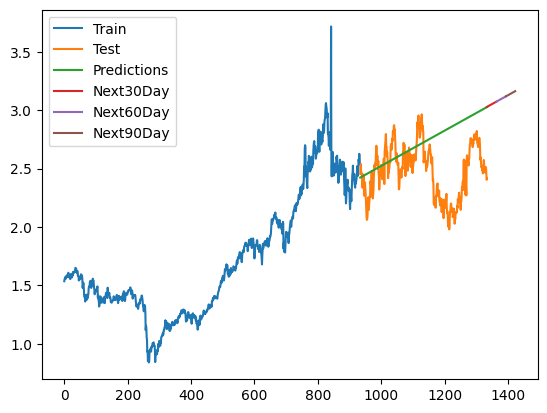

In [3784]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_30_days,y_next_30_days)
plt.plot(last_data_60_days,y_next_60_days)
plt.plot(last_data_90_days,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day','Next60Day','Next90Day'])
plt.show()

# Heating Oil

## 7:3

In [3785]:
df= pd.read_csv('../dataset/Heating Oil.csv')
df = df.dropna() # Drop missing values


### Các hàm chuyển kiểu dữ liệu cho Vol, Change, Date

In [3786]:
def convert_volume_to_number(volume_str):
    if isinstance(volume_str, float):
        return volume_str
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    else:
        return volume_str


def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%'))
    return new_change

def convert_str_to_number(str):
    return float(str.replace(',', ''))

df['Vol.'] = df['Vol.'] .apply(convert_volume_to_number)
df['Change %'] = df['Change %'].apply(convert_change_to_number)
df['Date'] = pd.to_datetime(df['Date'])
df = df.iloc[::-1].reset_index(drop=True)

In [3787]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1324 non-null   datetime64[ns]
 1   Price     1324 non-null   float64       
 2   Open      1324 non-null   float64       
 3   High      1324 non-null   float64       
 4   Low       1324 non-null   float64       
 5   Vol.      1324 non-null   int64         
 6   Change %  1324 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 72.5 KB


### Tạo hàm Eval

In [3788]:
def eval(test,pred):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)



In [3789]:

# Chuyển đổi cột 'Price' thành mảng NumPy
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

,Price
0,2.0010
1,2.0143
2,2.0164
3,2.0162
4,2.0127
...,...
1319,2.4136
1320,2.4650
1321,2.4370
1322,2.3694


### Train, Test


In [3790]:
# Split the data into training, testing sets
train_size = int(0.7 * len(df))
test_size = len(df)-train_size
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

### Tạo và huấn luyện mô hình

In [3791]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [3792]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)


### Eval

In [3793]:
eval(y_test,y_pred)

** Testing **
MAE:  0.9139610301114657
MAPE:  34.35797018469427
RMSE:  1.0155994104415489


### Predict

In [3794]:
last_index =  df.index[-1]
last_data_30_days = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)
last_data_60_days = pd.RangeIndex(start=last_index+30, stop=last_index+60, step=1)
x_next_60_days = np.array(range(last_index+31, last_index+61)).reshape(-1, 1)
y_next_60_days = model.predict(x_next_60_days)
last_data_90_days = pd.RangeIndex(start=last_index+60, stop=last_index+90, step=1)
x_next_90_days = np.array(range(last_index+61, last_index+91)).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)

In [3795]:
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)
     

Predicted closing prices for the next 30 days:
[4.16037873 4.16270353 4.16502834 4.16735314 4.16967794 4.17200274
 4.17432754 4.17665235 4.17897715 4.18130195 4.18362675 4.18595156
 4.18827636 4.19060116 4.19292596 4.19525076 4.19757557 4.19990037
 4.20222517 4.20454997 4.20687477 4.20919958 4.21152438 4.21384918
 4.21617398 4.21849879 4.22082359 4.22314839 4.22547319 4.22779799]
Predicted closing prices for the next 60 days:
[4.2301228  4.2324476  4.2347724  4.2370972  4.23942201 4.24174681
 4.24407161 4.24639641 4.24872121 4.25104602 4.25337082 4.25569562
 4.25802042 4.26034522 4.26267003 4.26499483 4.26731963 4.26964443
 4.27196924 4.27429404 4.27661884 4.27894364 4.28126844 4.28359325
 4.28591805 4.28824285 4.29056765 4.29289246 4.29521726 4.29754206]
Predicted closing prices for the next 90 days:
[4.29986686 4.30219166 4.30451647 4.30684127 4.30916607 4.31149087
 4.31381567 4.31614048 4.31846528 4.32079008 4.32311488 4.32543969
 4.32776449 4.33008929 4.33241409 4.33473889 4.337063

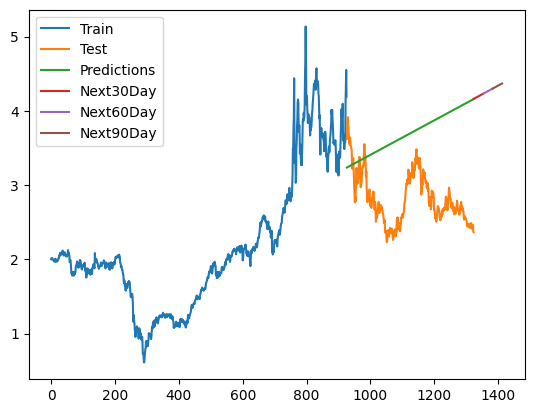

In [3796]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_30_days,y_next_30_days)
plt.plot(last_data_60_days,y_next_60_days)
plt.plot(last_data_90_days,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day','Next60Day','Next90Day'])
plt.show()

# Cruide Oil WTI 

## 8:2

In [3797]:
df= pd.read_csv('../dataset/Crude Oil.csv')
df = df.dropna() # Drop missing values


### Các hàm chuyển kiểu dữ liệu cho Vol, Change, Date

In [3798]:
def convert_volume_to_number(volume_str):
    if isinstance(volume_str, float):
        return volume_str
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    else:
        return volume_str


def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%'))
    return new_change

def convert_str_to_number(str):
    return float(str.replace(',', ''))

df['Vol.'] = df['Vol.'] .apply(convert_volume_to_number)
df['Change %'] = df['Change %'].apply(convert_change_to_number)
df['Date'] = pd.to_datetime(df['Date'])
df = df.iloc[::-1].reset_index(drop=True)

In [3799]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1301 non-null   datetime64[ns]
 1   Price     1301 non-null   float64       
 2   Open      1301 non-null   float64       
 3   High      1301 non-null   float64       
 4   Low       1301 non-null   float64       
 5   Vol.      1301 non-null   int64         
 6   Change %  1301 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 71.3 KB


### Tạo hàm Eval

In [3800]:
def eval(test,pred):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)



In [3801]:

# Chuyển đổi cột 'Price' thành mảng NumPy
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

,Price
0,55.80
1,56.59
2,56.56
3,56.22
4,56.66
...,...
1296,77.72
1297,79.83
1298,79.23
1299,77.91


### Train, Test


In [3802]:
# Split the data into training, testing sets
train_size = int(0.8 * len(df))
test_size = len(df)-train_size
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

### Tạo và huấn luyện mô hình

In [3803]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [3804]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)


### Eval

In [3805]:
eval(y_test,y_pred)

** Testing **
MAE:  19.415275096450898
MAPE:  25.288477517086825
RMSE:  20.409083487647347


### Predict

In [3806]:
last_index =  df.index[-1]
last_data_30_days = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)
last_data_60_days = pd.RangeIndex(start=last_index+30, stop=last_index+60, step=1)
x_next_60_days = np.array(range(last_index+31, last_index+61)).reshape(-1, 1)
y_next_60_days = model.predict(x_next_60_days)
last_data_90_days = pd.RangeIndex(start=last_index+60, stop=last_index+90, step=1)
x_next_90_days = np.array(range(last_index+61, last_index+91)).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)

In [3807]:
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)
     

Predicted closing prices for the next 30 days:
[104.53822571 104.58770014 104.63717456 104.68664899 104.73612342
 104.78559784 104.83507227 104.8845467  104.93402112 104.98349555
 105.03296997 105.0824444  105.13191883 105.18139325 105.23086768
 105.28034211 105.32981653 105.37929096 105.42876539 105.47823981
 105.52771424 105.57718866 105.62666309 105.67613752 105.72561194
 105.77508637 105.8245608  105.87403522 105.92350965 105.97298407]
Predicted closing prices for the next 60 days:
[106.0224585  106.07193293 106.12140735 106.17088178 106.22035621
 106.26983063 106.31930506 106.36877949 106.41825391 106.46772834
 106.51720276 106.56667719 106.61615162 106.66562604 106.71510047
 106.7645749  106.81404932 106.86352375 106.91299817 106.9624726
 107.01194703 107.06142145 107.11089588 107.16037031 107.20984473
 107.25931916 107.30879359 107.35826801 107.40774244 107.45721686]
Predicted closing prices for the next 90 days:
[107.50669129 107.55616572 107.60564014 107.65511457 107.704589
 1

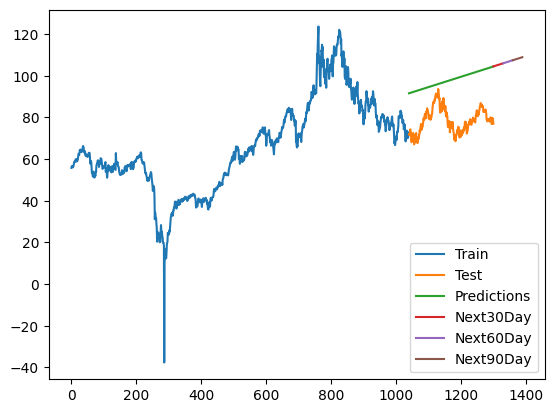

In [3808]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_30_days,y_next_30_days)
plt.plot(last_data_60_days,y_next_60_days)
plt.plot(last_data_90_days,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day','Next60Day','Next90Day'])
plt.show()

# Gasoline RBOB

## 8:2

In [3809]:
df= pd.read_csv('../dataset/Gasoline RBOB.csv')
df = df.dropna() # Drop missing values


### Các hàm chuyển kiểu dữ liệu cho Vol, Change, Date

In [3810]:
def convert_volume_to_number(volume_str):
    if isinstance(volume_str, float):
        return volume_str
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    else:
        return volume_str


def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%'))
    return new_change

def convert_str_to_number(str):
    return float(str.replace(',', ''))

df['Vol.'] = df['Vol.'] .apply(convert_volume_to_number)
df['Change %'] = df['Change %'].apply(convert_change_to_number)
df['Date'] = pd.to_datetime(df['Date'])
df = df.iloc[::-1].reset_index(drop=True)

In [3811]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335 entries, 0 to 1334
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1335 non-null   datetime64[ns]
 1   Price     1335 non-null   float64       
 2   Open      1335 non-null   float64       
 3   High      1335 non-null   float64       
 4   Low       1335 non-null   float64       
 5   Vol.      1335 non-null   int64         
 6   Change %  1335 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 73.1 KB


### Tạo hàm Eval

In [3812]:
def eval(test,pred):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)



In [3813]:

# Chuyển đổi cột 'Price' thành mảng NumPy
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

,Price
0,1.5356
1,1.5530
2,1.5601
3,1.5674
4,1.5743
...,...
1330,2.5140
1331,2.5090
1332,2.4644
1333,2.4046


### Train, Test


In [3814]:
# Split the data into training, testing sets
train_size = int(0.8 * len(df))
test_size = len(df)-train_size
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

### Tạo và huấn luyện mô hình

In [3815]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [3816]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)


### Eval

In [3817]:
eval(y_test,y_pred)

** Testing **
MAE:  0.3630778014240492
MAPE:  15.683703934504257
RMSE:  0.4352749226138338


### Predict

In [3818]:
last_index =  df.index[-1]
last_data_30_days = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)
last_data_60_days = pd.RangeIndex(start=last_index+30, stop=last_index+60, step=1)
x_next_60_days = np.array(range(last_index+31, last_index+61)).reshape(-1, 1)
y_next_60_days = model.predict(x_next_60_days)
last_data_90_days = pd.RangeIndex(start=last_index+60, stop=last_index+90, step=1)
x_next_90_days = np.array(range(last_index+61, last_index+91)).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)

In [3819]:
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)
     

Predicted closing prices for the next 30 days:
[3.00576177 3.00724916 3.00873654 3.01022392 3.01171131 3.01319869
 3.01468607 3.01617346 3.01766084 3.01914822 3.02063561 3.02212299
 3.02361037 3.02509776 3.02658514 3.02807252 3.02955991 3.03104729
 3.03253467 3.03402206 3.03550944 3.03699682 3.03848421 3.03997159
 3.04145897 3.04294636 3.04443374 3.04592112 3.04740851 3.04889589]
Predicted closing prices for the next 60 days:
[3.05038327 3.05187066 3.05335804 3.05484542 3.0563328  3.05782019
 3.05930757 3.06079495 3.06228234 3.06376972 3.0652571  3.06674449
 3.06823187 3.06971925 3.07120664 3.07269402 3.0741814  3.07566879
 3.07715617 3.07864355 3.08013094 3.08161832 3.0831057  3.08459309
 3.08608047 3.08756785 3.08905524 3.09054262 3.09203    3.09351739]
Predicted closing prices for the next 90 days:
[3.09500477 3.09649215 3.09797954 3.09946692 3.1009543  3.10244169
 3.10392907 3.10541645 3.10690384 3.10839122 3.1098786  3.11136599
 3.11285337 3.11434075 3.11582814 3.11731552 3.118802

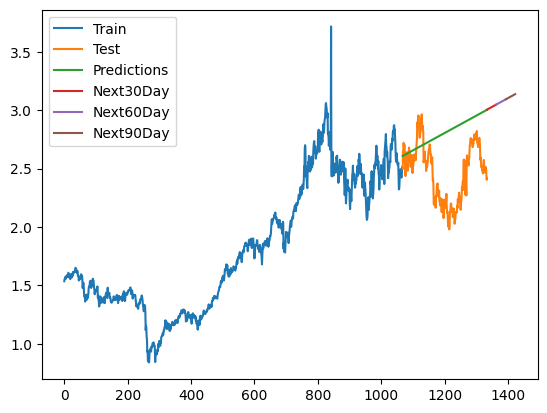

In [3820]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_30_days,y_next_30_days)
plt.plot(last_data_60_days,y_next_60_days)
plt.plot(last_data_90_days,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day','Next60Day','Next90Day'])
plt.show()

# Heating Oil

## 8:2

In [3821]:
df= pd.read_csv('../dataset/Heating Oil.csv')
df = df.dropna() # Drop missing values


### Các hàm chuyển kiểu dữ liệu cho Vol, Change, Date

In [3822]:
def convert_volume_to_number(volume_str):
    if isinstance(volume_str, float):
        return volume_str
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    else:
        return volume_str


def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%'))
    return new_change

def convert_str_to_number(str):
    return float(str.replace(',', ''))

df['Vol.'] = df['Vol.'] .apply(convert_volume_to_number)
df['Change %'] = df['Change %'].apply(convert_change_to_number)
df['Date'] = pd.to_datetime(df['Date'])
df = df.iloc[::-1].reset_index(drop=True)

In [3823]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1324 non-null   datetime64[ns]
 1   Price     1324 non-null   float64       
 2   Open      1324 non-null   float64       
 3   High      1324 non-null   float64       
 4   Low       1324 non-null   float64       
 5   Vol.      1324 non-null   int64         
 6   Change %  1324 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 72.5 KB


### Tạo hàm Eval

In [3824]:
def eval(test,pred):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)



In [3825]:

# Chuyển đổi cột 'Price' thành mảng NumPy
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

,Price
0,2.0010
1,2.0143
2,2.0164
3,2.0162
4,2.0127
...,...
1319,2.4136
1320,2.4650
1321,2.4370
1322,2.3694


### Train, Test


In [3826]:
# Split the data into training, testing sets
train_size = int(0.8 * len(df))
test_size = len(df)-train_size
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

### Tạo và huấn luyện mô hình

In [3827]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [3828]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)


### Eval

In [3829]:
eval(y_test,y_pred)

** Testing **
MAE:  0.8498874987810356
MAPE:  32.29513734337704
RMSE:  0.9167143833499843


### Predict

In [3830]:
last_index =  df.index[-1]
last_data_30_days = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)
last_data_60_days = pd.RangeIndex(start=last_index+30, stop=last_index+60, step=1)
x_next_60_days = np.array(range(last_index+31, last_index+61)).reshape(-1, 1)
y_next_60_days = model.predict(x_next_60_days)
last_data_90_days = pd.RangeIndex(start=last_index+60, stop=last_index+90, step=1)
x_next_90_days = np.array(range(last_index+61, last_index+91)).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)

In [3831]:
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)
     

Predicted closing prices for the next 30 days:
[3.87029672 3.87232592 3.87435511 3.87638431 3.8784135  3.8804427
 3.88247189 3.88450108 3.88653028 3.88855947 3.89058867 3.89261786
 3.89464705 3.89667625 3.89870544 3.90073464 3.90276383 3.90479302
 3.90682222 3.90885141 3.91088061 3.9129098  3.91493899 3.91696819
 3.91899738 3.92102658 3.92305577 3.92508496 3.92711416 3.92914335]
Predicted closing prices for the next 60 days:
[3.93117255 3.93320174 3.93523094 3.93726013 3.93928932 3.94131852
 3.94334771 3.94537691 3.9474061  3.94943529 3.95146449 3.95349368
 3.95552288 3.95755207 3.95958126 3.96161046 3.96363965 3.96566885
 3.96769804 3.96972723 3.97175643 3.97378562 3.97581482 3.97784401
 3.9798732  3.9819024  3.98393159 3.98596079 3.98798998 3.99001917]
Predicted closing prices for the next 90 days:
[3.99204837 3.99407756 3.99610676 3.99813595 4.00016515 4.00219434
 4.00422353 4.00625273 4.00828192 4.01031112 4.01234031 4.0143695
 4.0163987  4.01842789 4.02045709 4.02248628 4.02451547

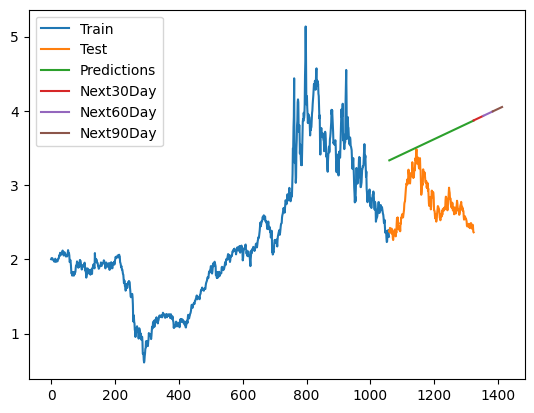

In [3832]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_30_days,y_next_30_days)
plt.plot(last_data_60_days,y_next_60_days)
plt.plot(last_data_90_days,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day','Next60Day','Next90Day'])
plt.show()

# Cruide Oil WTI 

## 9:1

In [3833]:
df= pd.read_csv('../dataset/Crude Oil.csv')
df = df.dropna() # Drop missing values


### Các hàm chuyển kiểu dữ liệu cho Vol, Change, Date

In [3834]:
def convert_volume_to_number(volume_str):
    if isinstance(volume_str, float):
        return volume_str
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    else:
        return volume_str


def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%'))
    return new_change

def convert_str_to_number(str):
    return float(str.replace(',', ''))

df['Vol.'] = df['Vol.'] .apply(convert_volume_to_number)
df['Change %'] = df['Change %'].apply(convert_change_to_number)
df['Date'] = pd.to_datetime(df['Date'])
df = df.iloc[::-1].reset_index(drop=True)

In [3835]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1301 non-null   datetime64[ns]
 1   Price     1301 non-null   float64       
 2   Open      1301 non-null   float64       
 3   High      1301 non-null   float64       
 4   Low       1301 non-null   float64       
 5   Vol.      1301 non-null   int64         
 6   Change %  1301 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 71.3 KB


### Tạo hàm Eval

In [3836]:
def eval(test,pred):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)



In [3837]:

# Chuyển đổi cột 'Price' thành mảng NumPy
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

,Price
0,55.80
1,56.59
2,56.56
3,56.22
4,56.66
...,...
1296,77.72
1297,79.83
1298,79.23
1299,77.91


### Train, Test


In [3838]:
# Split the data into training, testing sets
train_size = int(0.9 * len(df))
test_size = len(df)-train_size
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

### Tạo và huấn luyện mô hình

In [3839]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [3840]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)


### Eval

In [3841]:
eval(y_test,y_pred)

** Testing **
MAE:  16.936967836078598
MAPE:  22.103648545008596
RMSE:  17.280308609367843


### Predict

In [3842]:
last_index =  df.index[-1]
last_data_30_days = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)
last_data_60_days = pd.RangeIndex(start=last_index+30, stop=last_index+60, step=1)
x_next_60_days = np.array(range(last_index+31, last_index+61)).reshape(-1, 1)
y_next_60_days = model.predict(x_next_60_days)
last_data_90_days = pd.RangeIndex(start=last_index+60, stop=last_index+90, step=1)
x_next_90_days = np.array(range(last_index+61, last_index+91)).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)

In [3843]:
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)
     

Predicted closing prices for the next 30 days:
[97.39401279 97.43587642 97.47774004 97.51960366 97.56146729 97.60333091
 97.64519454 97.68705816 97.72892178 97.77078541 97.81264903 97.85451265
 97.89637628 97.9382399  97.98010352 98.02196715 98.06383077 98.1056944
 98.14755802 98.18942164 98.23128527 98.27314889 98.31501251 98.35687614
 98.39873976 98.44060338 98.48246701 98.52433063 98.56619425 98.60805788]
Predicted closing prices for the next 60 days:
[98.6499215  98.69178513 98.73364875 98.77551237 98.817376   98.85923962
 98.90110324 98.94296687 98.98483049 99.02669411 99.06855774 99.11042136
 99.15228498 99.19414861 99.23601223 99.27787586 99.31973948 99.3616031
 99.40346673 99.44533035 99.48719397 99.5290576  99.57092122 99.61278484
 99.65464847 99.69651209 99.73837571 99.78023934 99.82210296 99.86396659]
Predicted closing prices for the next 90 days:
[ 99.90583021  99.94769383  99.98955746 100.03142108 100.0732847
 100.11514833 100.15701195 100.19887557 100.2407392  100.2826028

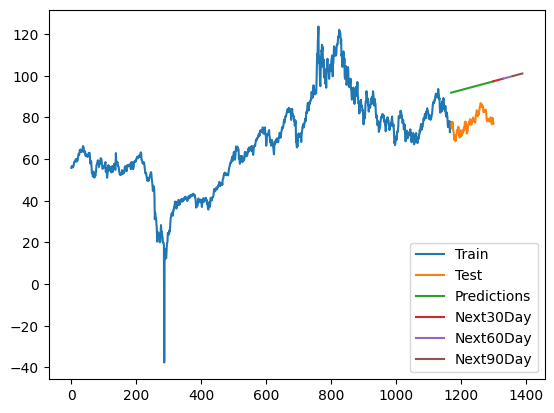

In [3844]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_30_days,y_next_30_days)
plt.plot(last_data_60_days,y_next_60_days)
plt.plot(last_data_90_days,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day','Next60Day','Next90Day'])
plt.show()

# Gasoline RBOB

## 9:1

In [3845]:
df= pd.read_csv('../dataset/Gasoline RBOB.csv')
df = df.dropna() # Drop missing values


### Các hàm chuyển kiểu dữ liệu cho Vol, Change, Date

In [3846]:
def convert_volume_to_number(volume_str):
    if isinstance(volume_str, float):
        return volume_str
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    else:
        return volume_str


def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%'))
    return new_change

def convert_str_to_number(str):
    return float(str.replace(',', ''))

df['Vol.'] = df['Vol.'] .apply(convert_volume_to_number)
df['Change %'] = df['Change %'].apply(convert_change_to_number)
df['Date'] = pd.to_datetime(df['Date'])
df = df.iloc[::-1].reset_index(drop=True)

In [3847]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335 entries, 0 to 1334
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1335 non-null   datetime64[ns]
 1   Price     1335 non-null   float64       
 2   Open      1335 non-null   float64       
 3   High      1335 non-null   float64       
 4   Low       1335 non-null   float64       
 5   Vol.      1335 non-null   int64         
 6   Change %  1335 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 73.1 KB


### Tạo hàm Eval

In [3848]:
def eval(test,pred):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)



In [3849]:

# Chuyển đổi cột 'Price' thành mảng NumPy
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

,Price
0,1.5356
1,1.5530
2,1.5601
3,1.5674
4,1.5743
...,...
1330,2.5140
1331,2.5090
1332,2.4644
1333,2.4046


### Train, Test


In [3850]:
# Split the data into training, testing sets
train_size = int(0.9 * len(df))
test_size = len(df)-train_size
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

### Tạo và huấn luyện mô hình

In [3851]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [3852]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)


### Eval

In [3853]:
eval(y_test,y_pred)

** Testing **
MAE:  0.4071550246501986
MAPE:  17.923503202003847
RMSE:  0.4580955984836582


### Predict

In [3854]:
last_index =  df.index[-1]
last_data_30_days = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)
last_data_60_days = pd.RangeIndex(start=last_index+30, stop=last_index+60, step=1)
x_next_60_days = np.array(range(last_index+31, last_index+61)).reshape(-1, 1)
y_next_60_days = model.predict(x_next_60_days)
last_data_90_days = pd.RangeIndex(start=last_index+60, stop=last_index+90, step=1)
x_next_90_days = np.array(range(last_index+61, last_index+91)).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)

In [3855]:
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)
     

Predicted closing prices for the next 30 days:
[2.91835017 2.9197449  2.92113963 2.92253436 2.92392909 2.92532382
 2.92671856 2.92811329 2.92950802 2.93090275 2.93229748 2.93369221
 2.93508695 2.93648168 2.93787641 2.93927114 2.94066587 2.94206061
 2.94345534 2.94485007 2.9462448  2.94763953 2.94903426 2.950429
 2.95182373 2.95321846 2.95461319 2.95600792 2.95740265 2.95879739]
Predicted closing prices for the next 60 days:
[2.96019212 2.96158685 2.96298158 2.96437631 2.96577105 2.96716578
 2.96856051 2.96995524 2.97134997 2.9727447  2.97413944 2.97553417
 2.9769289  2.97832363 2.97971836 2.98111309 2.98250783 2.98390256
 2.98529729 2.98669202 2.98808675 2.98948149 2.99087622 2.99227095
 2.99366568 2.99506041 2.99645514 2.99784988 2.99924461 3.00063934]
Predicted closing prices for the next 90 days:
[3.00203407 3.0034288  3.00482354 3.00621827 3.007613   3.00900773
 3.01040246 3.01179719 3.01319193 3.01458666 3.01598139 3.01737612
 3.01877085 3.02016558 3.02156032 3.02295505 3.02434978

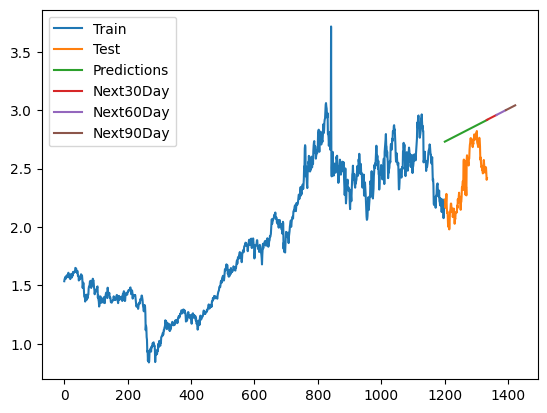

In [3856]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_30_days,y_next_30_days)
plt.plot(last_data_60_days,y_next_60_days)
plt.plot(last_data_90_days,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day','Next60Day','Next90Day'])
plt.show()

# Heating Oil

## 9:1

In [3857]:
df= pd.read_csv('../dataset/Heating Oil.csv')
df = df.dropna() # Drop missing values


### Các hàm chuyển kiểu dữ liệu cho Vol, Change, Date

In [3858]:
def convert_volume_to_number(volume_str):
    if isinstance(volume_str, float):
        return volume_str
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    else:
        return volume_str


def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%'))
    return new_change

def convert_str_to_number(str):
    return float(str.replace(',', ''))

df['Vol.'] = df['Vol.'] .apply(convert_volume_to_number)
df['Change %'] = df['Change %'].apply(convert_change_to_number)
df['Date'] = pd.to_datetime(df['Date'])
df = df.iloc[::-1].reset_index(drop=True)

In [3859]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1324 non-null   datetime64[ns]
 1   Price     1324 non-null   float64       
 2   Open      1324 non-null   float64       
 3   High      1324 non-null   float64       
 4   Low       1324 non-null   float64       
 5   Vol.      1324 non-null   int64         
 6   Change %  1324 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 72.5 KB


### Tạo hàm Eval

In [3860]:
def eval(test,pred):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)



In [3861]:

# Chuyển đổi cột 'Price' thành mảng NumPy
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

,Price
0,2.0010
1,2.0143
2,2.0164
3,2.0162
4,2.0127
...,...
1319,2.4136
1320,2.4650
1321,2.4370
1322,2.3694


### Train, Test


In [3862]:
# Split the data into training, testing sets
train_size = int(0.9 * len(df))
test_size = len(df)-train_size
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

### Tạo và huấn luyện mô hình

In [3863]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [3864]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)


### Eval

In [3865]:
eval(y_test,y_pred)

** Testing **
MAE:  0.8219475907539615
MAPE:  31.445327031787183
RMSE:  0.8411751358182887


### Predict

In [3866]:
last_index =  df.index[-1]
last_data_30_days = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)
last_data_60_days = pd.RangeIndex(start=last_index+30, stop=last_index+60, step=1)
x_next_60_days = np.array(range(last_index+31, last_index+61)).reshape(-1, 1)
y_next_60_days = model.predict(x_next_60_days)
last_data_90_days = pd.RangeIndex(start=last_index+60, stop=last_index+90, step=1)
x_next_90_days = np.array(range(last_index+61, last_index+91)).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)

In [3867]:
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)
     

Predicted closing prices for the next 30 days:
[3.58571117 3.58744293 3.5891747  3.59090646 3.59263823 3.59436999
 3.59610176 3.59783352 3.59956529 3.60129705 3.60302882 3.60476058
 3.60649234 3.60822411 3.60995587 3.61168764 3.6134194  3.61515117
 3.61688293 3.6186147  3.62034646 3.62207823 3.62380999 3.62554176
 3.62727352 3.62900529 3.63073705 3.63246882 3.63420058 3.63593235]
Predicted closing prices for the next 60 days:
[3.63766411 3.63939588 3.64112764 3.6428594  3.64459117 3.64632293
 3.6480547  3.64978646 3.65151823 3.65324999 3.65498176 3.65671352
 3.65844529 3.66017705 3.66190882 3.66364058 3.66537235 3.66710411
 3.66883588 3.67056764 3.67229941 3.67403117 3.67576294 3.6774947
 3.67922646 3.68095823 3.68268999 3.68442176 3.68615352 3.68788529]
Predicted closing prices for the next 90 days:
[3.68961705 3.69134882 3.69308058 3.69481235 3.69654411 3.69827588
 3.70000764 3.70173941 3.70347117 3.70520294 3.7069347  3.70866647
 3.71039823 3.71213    3.71386176 3.71559352 3.7173252

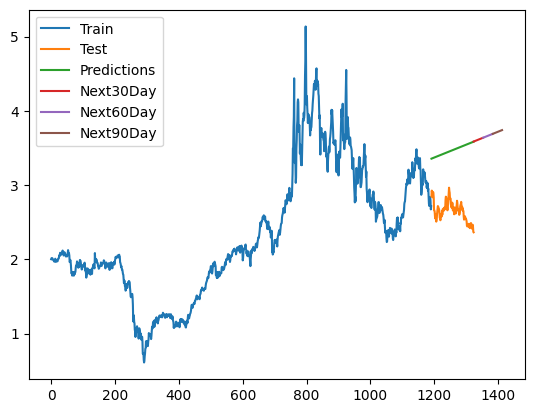

In [3868]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_30_days,y_next_30_days)
plt.plot(last_data_60_days,y_next_60_days)
plt.plot(last_data_90_days,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day','Next60Day','Next90Day'])
plt.show()